In [1]:
import numpy as np
import sklearn.datasets as datasets
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt

import mlgrad.regr as regr
import mlgrad.model as model
import mlgrad.func as func

In [2]:
X, Y = datasets.fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [3]:
print(X.shape, Y.shape)

(70000, 784) (70000,)


In [4]:
I1 = (Y == 1)
I7 = (Y == 7)
IX = (Y != 1) & (Y != 7)
X1 = X[I1]
Y1 = np.ones(len(X1), 'd')
X7 = X[I7]
Y7 = -np.ones(len(X7), 'd')
XX = X[IX]
YX = np.zeros(len(XX), 'd')

X17 = np.concatenate((X1, X7, XX), axis=0)
Y17 = np.concatenate((Y1, Y7, YX))

N = len(Y17)
print(X17.shape, Y17.shape)

(70000, 784) (70000,)


In [5]:
for i in range(N):
    X17[i] = scale(X17[i])

In [6]:
np.sqrt(784)

28.0

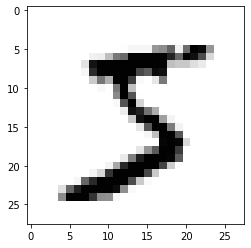

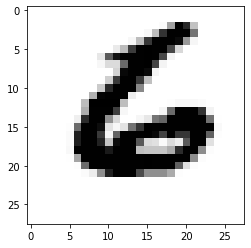

In [7]:
plt.imshow(X17[0].reshape(28,28), plt.cm.Greys)
plt.show()
plt.imshow(X17[-1].reshape(28,28), plt.cm.Greys)
plt.show()

In [8]:
def sigma_neuron_layer(n_input, n_output):
    outfunc = func.Sigmoidal()
    layer = model.SigmaNeuronModelLayer(outfunc, n_input, n_output)
    return layer

In [9]:
def create_nn(n_input, n_hidden):
    layer1 = sigma_neuron_layer(n_input, n_hidden)

    body = model.FFNetworkModel()
    body.add(layer1)

    head = model.LinearModel(n_hidden)
    ffnn = model.FFNetworkFuncModel(head, body)
    ffnn.allocate()
    return ffnn

In [10]:
ffnn_sq = create_nn(784, 16)
ffnn_sq.param[:] = np.random.random(ffnn_sq.n_param)

In [ ]:
lr = regr.regression(X17, Y17, ffnn_sq, n_restart=1)

In [ ]:
plt.plot(np.log(lr.lvals))
plt.show()

In [ ]:
Y17_p = ffnn_sq.evaluate_all(X17)

In [ ]:
plt.scatter(Y17, Y17_p, c=Y17, s=9)
plt.show()